<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_excel(r"D:/Research project/share data/08-08-2008 to 01-07-2016/Updated_finale.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2472 non-null   datetime64[ns]
 1   Open_Crude Oil    1972 non-null   float64       
 2   Open_DJI          1988 non-null   float64       
 3   Open_EurUSD=X     2047 non-null   float64       
 4   Open_GOLD         1972 non-null   float64       
 5   Open_S & P 500    1972 non-null   float64       
 6   Open_Silver       1972 non-null   float64       
 7   High_Crude Oil    1972 non-null   float64       
 8   High_DJI          1988 non-null   float64       
 9   High_EurUSD=X     2047 non-null   float64       
 10  High_GOLD         1972 non-null   float64       
 11  High_S & P 500    1972 non-null   float64       
 12  High_Silver       1972 non-null   float64       
 13  Low_Crude Oil     1972 non-null   float64       
 14  Low_DJI           1988 n

In [4]:
data=data.round(decimals=2)
data1=data
data1=data1.interpolate(method='linear', limit_direction='forward', axis=0)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2472 non-null   datetime64[ns]
 1   Open_Crude Oil    2472 non-null   float64       
 2   Open_DJI          2472 non-null   float64       
 3   Open_EurUSD=X     2472 non-null   float64       
 4   Open_GOLD         2472 non-null   float64       
 5   Open_S & P 500    2472 non-null   float64       
 6   Open_Silver       2472 non-null   float64       
 7   High_Crude Oil    2472 non-null   float64       
 8   High_DJI          2472 non-null   float64       
 9   High_EurUSD=X     2472 non-null   float64       
 10  High_GOLD         2472 non-null   float64       
 11  High_S & P 500    2472 non-null   float64       
 12  High_Silver       2472 non-null   float64       
 13  Low_Crude Oil     2472 non-null   float64       
 14  Low_DJI           2472 n

In [6]:
df = pd.read_excel (r'D:/Research project/Data/Cleaned_Sentimental Data/Sentimental 1.xlsx')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1988 non-null   datetime64[ns]
 1   Top1    1988 non-null   float64       
 2   Top2    1988 non-null   float64       
 3   Top3    1988 non-null   float64       
 4   Top4    1988 non-null   float64       
 5   Top5    1988 non-null   float64       
 6   Top6    1988 non-null   float64       
 7   Top7    1988 non-null   float64       
 8   Top8    1988 non-null   float64       
 9   Top9    1988 non-null   float64       
 10  Top10   1988 non-null   float64       
 11  Top11   1988 non-null   float64       
 12  Top12   1988 non-null   float64       
 13  Top13   1988 non-null   float64       
 14  Top14   1988 non-null   float64       
 15  Top15   1988 non-null   float64       
 16  Top16   1988 non-null   float64       
 17  Top17   1988 non-null   float64       
 18  Top18   

In [8]:
df

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22
0,2008-08-08,-0.5994,0.0000,-0.3612,-0.7089,-0.9260,0.0000,-0.2732,0.2144,-0.5719,...,-0.7645,0.0000,-0.5994,0.0000,0.0000,0.2086,0.2023,0.0258,-0.7579,-0.6249
1,2008-08-11,0.8156,-0.3182,0.4404,-0.1965,0.0000,-0.4939,-0.5106,-0.0772,-0.6688,...,0.0000,-0.3818,-0.1027,0.0000,0.0000,-0.6597,0.0000,0.0000,-0.8020,0.0000
2,2008-08-12,0.0258,0.0000,-0.7845,-0.6124,0.0000,-0.6908,-0.5994,-0.5994,0.3400,...,-0.8591,0.0000,0.5423,0.0000,0.0000,0.0772,-0.5994,-0.5859,0.0000,0.5267
3,2008-08-13,-0.7184,-0.8074,-0.6369,-0.1280,-0.5106,0.0000,0.2960,0.0000,0.3612,...,-0.2500,-0.2960,0.0000,0.0000,0.0000,0.0000,-0.5423,-0.0258,-0.2960,0.4939
4,2008-08-14,0.2023,0.0000,0.6808,-0.8689,-0.6124,-0.6369,0.7177,-0.4404,-0.6808,...,0.0000,0.1779,0.0000,-0.6249,0.0000,0.0000,0.0000,0.0000,-0.4404,-0.5994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,2016-06-24,-0.3400,-0.0516,0.0000,-0.0516,0.0000,-0.0516,0.5423,0.0000,0.4767,...,0.0000,0.5598,-0.6597,0.0000,0.0000,-0.0516,0.2732,-0.0516,-0.2960,-0.4215
1984,2016-06-27,-0.2263,0.2732,-0.6369,-0.1027,0.6369,-0.5423,-0.7096,-0.5719,-0.5859,...,0.0000,0.0000,-0.8720,-0.5994,0.8442,-0.5994,-0.0772,0.3182,0.1724,-0.1027
1985,2016-06-28,0.8316,-0.4588,0.4939,0.3182,-0.7717,-0.7351,0.0000,0.2960,-0.2732,...,0.0000,-0.8676,-0.0258,0.5859,-0.6124,-0.0258,0.2732,0.2263,0.0000,0.6369
1986,2016-06-29,0.0000,-0.6808,0.7783,-0.7430,-0.4404,0.0000,-0.8020,0.2960,0.5719,...,-0.8225,-0.3875,-0.6908,0.5994,0.0000,-0.7430,-0.8807,-0.2263,-0.9211,-0.8402


In [10]:
fin_1= pd.merge(data1,df, how='outer')

In [11]:
fin_1

,Date,Open_Crude Oil,Open_DJI,Open_EurUSD=X,Open_GOLD,Open_S & P 500,Open_Silver,High_Crude Oil,High_DJI,High_EurUSD=X,...,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22
0,2008-08-08,119.900,11432.09,1.530000,868.80,1268.00,15.380,120.080,11759.960,1.530,...,-0.7645,0.0000,-0.5994,0.0000,0.0000,0.2086,0.2023,0.0258,-0.7579,-0.6249
1,2008-08-10,117.550,11580.88,1.525333,863.55,1279.75,15.005,118.490,11813.535,1.526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-08-11,115.200,11729.67,1.520667,858.30,1291.50,14.630,116.900,11867.110,1.522,...,0.0000,-0.3818,-0.1027,0.0000,0.0000,-0.6597,0.0000,0.0000,-0.8020,0.0000
3,2008-08-12,114.530,11781.70,1.516000,826.40,1303.75,14.780,115.950,11782.350,1.518,...,-0.8591,0.0000,0.5423,0.0000,0.0000,0.0772,-0.5994,-0.5859,0.0000,0.5267
4,2008-08-13,113.090,11632.81,1.511333,810.90,1291.25,14.810,117.460,11633.780,1.514,...,-0.2500,-0.2960,0.0000,0.0000,0.0000,0.0000,-0.5423,-0.0258,-0.2960,0.4939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,2016-06-26,49.055,17650.92,1.115000,1291.85,2064.75,17.540,49.205,17650.920,1.120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2468,2016-06-27,47.810,17355.21,1.100000,1330.00,2013.75,17.860,47.960,17355.210,1.110,...,0.0000,0.0000,-0.8720,-0.5994,0.8442,-0.5994,-0.0772,0.3182,0.1724,-0.1027
2469,2016-06-28,46.590,17190.51,1.100000,1314.80,1982.50,17.840,48.180,17409.720,1.110,...,0.0000,-0.8676,-0.0258,0.5859,-0.6124,-0.0258,0.2732,0.2263,0.0000,0.6369
2470,2016-06-29,48.060,17456.02,1.110000,1311.60,2028.25,17.800,50.000,17704.510,1.110,...,-0.8225,-0.3875,-0.6908,0.5994,0.0000,-0.7430,-0.8807,-0.2263,-0.9211,-0.8402


In [13]:
fin_2=fin_1.interpolate(method='ffill', limit_direction='forward', axis=0)

In [14]:
fin_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2472 entries, 0 to 2471
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2472 non-null   datetime64[ns]
 1   Open_Crude Oil    2472 non-null   float64       
 2   Open_DJI          2472 non-null   float64       
 3   Open_EurUSD=X     2472 non-null   float64       
 4   Open_GOLD         2472 non-null   float64       
 5   Open_S & P 500    2472 non-null   float64       
 6   Open_Silver       2472 non-null   float64       
 7   High_Crude Oil    2472 non-null   float64       
 8   High_DJI          2472 non-null   float64       
 9   High_EurUSD=X     2472 non-null   float64       
 10  High_GOLD         2472 non-null   float64       
 11  High_S & P 500    2472 non-null   float64       
 12  High_Silver       2472 non-null   float64       
 13  Low_Crude Oil     2472 non-null   float64       
 14  Low_DJI           2472 n

In [16]:
data_training = fin_2[fin_2['Date']<'2015-01-01'].copy()
data_test = fin_2[fin_2['Date']>='2015-01-01'].copy()

In [17]:
data_training = data_training.drop(['Date'], axis = 1)


In [18]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[9.81075811e-01, 4.24805449e-01, 1.00000000e+00, ...,
        1.85587468e-05, 4.17822458e-06, 6.47653349e-06],
       [9.54123179e-01, 4.37744194e-01, 9.86274510e-01, ...,
        3.96704335e-04, 3.97160408e-04, 3.96940888e-04],
       [9.27170547e-01, 4.50682939e-01, 9.72549020e-01, ...,
        1.80703089e-05, 3.34333693e-06, 1.83069508e-05],
       ...,
       [2.37297855e-01, 1.00000000e+00, 8.82352941e-02, ...,
        7.24326893e-06, 1.85265545e-05, 1.83069508e-05],
       [2.22043812e-01, 9.98994745e-01, 8.82352941e-02, ...,
        1.24381278e-05, 1.44638132e-06, 1.27031686e-05],
       [2.23764193e-01, 9.94876330e-01, 8.82352941e-02, ...,
        1.80703089e-05, 6.46895939e-06, 4.70641983e-06]])

In [19]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train.shape

(1943, 60, 51)

In [21]:
X_train

array([[[9.81075811e-01, 4.24805449e-01, 1.00000000e+00, ...,
         1.85587468e-05, 4.17822458e-06, 6.47653349e-06],
        [9.54123179e-01, 4.37744194e-01, 9.86274510e-01, ...,
         3.96704335e-04, 3.97160408e-04, 3.96940888e-04],
        [9.27170547e-01, 4.50682939e-01, 9.72549020e-01, ...,
         1.80703089e-05, 3.34333693e-06, 1.83069508e-05],
        ...,
        [5.46392935e-01, 2.47136197e-01, 5.00000000e-01, ...,
         6.72264714e-06, 1.25024898e-05, 1.83069508e-05],
        [5.09118018e-01, 2.39565479e-01, 5.00000000e-01, ...,
         4.99228964e-06, 2.78769175e-05, 6.95929176e-06],
        [4.50051611e-01, 1.76530949e-01, 4.41176471e-01, ...,
         1.80703089e-05, 1.85265545e-05, 5.41825164e-06]],

       [[9.54123179e-01, 4.37744194e-01, 9.86274510e-01, ...,
         3.96704335e-04, 3.97160408e-04, 3.96940888e-04],
        [9.27170547e-01, 4.50682939e-01, 9.72549020e-01, ...,
         1.80703089e-05, 3.34333693e-06, 1.83069508e-05],
        [9.19486180e-01, 

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [23]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 51)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [24]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            26880     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [25]:
from keras.callbacks import ModelCheckpoint

In [26]:
# compile Model
regressor.compile(optimizer='adam', loss = 'mean_squared_error',metrics=['accuracy'])
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
#Fit the model
regressor.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=callbacks_list)


Train on 1943 samples
Epoch 1/10
1943/1943 [==============================] - 12s 6ms/sample - loss: 0.0300 - accuracy: 5.1467e-04
Epoch 2/10
  32/1943 [..............................] - ETA: 5s - loss: 0.0096 - accuracy: 0.0000e+00

C:\Users\harit\.conda\envs\tensorflow\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1943/1943 [==============================] - 7s 3ms/sample - loss: 0.0077 - accuracy: 5.1467e-04
Epoch 3/10
1943/1943 [==============================] - 7s 3ms/sample - loss: 0.0065 - accuracy: 5.1467e-04
Epoch 4/10
1943/1943 [==============================] - 7s 3ms/sample - loss: 0.0051 - accuracy: 5.1467e-04
Epoch 5/10
1943/1943 [==============================] - 6s 3ms/sample - loss: 0.0046 - accuracy: 5.1467e-04
Epoch 6/10
1943/1943 [==============================] - 7s 4ms/sample - loss: 0.0049 - accuracy: 5.1467e-04
Epoch 7/10
1943/1943 [==============================] - 7s 4ms/sample - loss: 0.0041 - accuracy: 5.1467e-04
Epoch 8/10
1943/1943 [==============================] - 7s 4ms/sample - loss: 0.0042 - accuracy: 5.1467e-04
Epoch 9/10
1943/1943 [==============================] - 7s 3ms/sample - loss: 0.0037 - accuracy: 5.1467e-04
Epoch 10/10
1943/1943 [==============================] - 7s 4ms/sample - loss: 0.0033 - accuracy: 5.1467e-04


In [27]:
data_test.head()

,Date,Open_Crude Oil,Open_DJI,Open_EurUSD=X,Open_GOLD,Open_S & P 500,Open_Silver,High_Crude Oil,High_DJI,High_EurUSD=X,...,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22
2003,2015-01-01,53.815,17905.365,1.210,1191.60,2065.625,16.020,54.565,17997.50,1.210,...,18.5000,18.5000,18.5000,18.5000,18.5000,18.5000,18.5000,18.5000,18.5000,18.5000
2004,2015-01-02,53.760,17823.070,1.210,1184.00,2055.000,15.790,55.110,17951.78,1.210,...,-0.8176,0.7783,0.0000,-0.1531,-0.6674,-0.8020,-0.7783,-0.4939,0.6369,0.1779
2005,2015-01-04,53.185,17822.185,1.205,1182.15,2050.375,15.985,53.920,17886.54,1.205,...,6.5000,6.5000,6.5000,6.5000,6.5000,6.5000,6.5000,6.5000,6.5000,6.5000
2006,2015-01-05,52.610,17821.300,1.200,1180.30,2045.750,16.180,52.730,17821.30,1.200,...,-0.4767,0.0000,-0.6249,-0.7003,0.0000,-0.1779,0.0000,-0.6486,-0.9738,-0.7430
2007,2015-01-06,50.000,17504.180,1.190,1203.50,2019.000,16.600,50.370,17581.05,1.200,...,0.0000,0.4588,0.0000,-0.5994,-0.4019,0.0000,-0.2023,0.0000,-0.6124,-0.4927


In [28]:
data_training1 = fin_2[fin_2['Date']<'2015-01-01'].copy()

In [29]:
past_60_days = data_training1.tail(60)

In [30]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

,Open_Crude Oil,Open_DJI,Open_EurUSD=X,Open_GOLD,Open_S & P 500,Open_Silver,High_Crude Oil,High_DJI,High_EurUSD=X,High_GOLD,...,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22
0,80.42,16468.07,1.26,1228.0,1924.500,17.170,82.37,16767.520,1.27,1228.50,...,-0.6597,-0.5423,0.5106,0.0000,0.2263,-0.7579,-0.9517,0.5994,0.0000,0.0000
1,81.95,16677.04,1.27,1229.4,1946.000,17.140,81.95,16811.710,1.27,1232.70,...,-0.6249,-0.7717,-0.6369,0.0000,-0.5994,-0.7579,-0.2263,-0.6486,-0.7579,0.0000
2,81.61,16736.57,1.27,1229.8,1953.125,17.125,81.62,16824.345,1.27,1231.45,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,81.27,16796.10,1.27,1230.2,1960.250,17.110,81.29,16836.980,1.27,1230.20,...,0.0000,0.0000,0.0000,0.0000,0.0000,-0.2960,0.4767,-0.8660,-0.8779,-0.4404
4,80.64,16825.19,1.27,1224.9,1957.750,17.180,81.66,17006.450,1.28,1231.00,...,-0.5574,0.8750,0.0000,-0.9674,0.0000,-0.6808,0.0000,-0.6759,-0.5574,0.4588


In [31]:
inputs = scaler.transform(df)
inputs

array([[ 5.28271591e-01,  8.62733128e-01,  2.05882353e-01, ...,
         2.94179707e-05,  1.85265545e-05,  1.83069508e-05],
       [ 5.45819475e-01,  8.80905112e-01,  2.35294118e-01, ...,
         5.79120743e-06,  4.17822458e-06,  1.83069508e-05],
       [ 5.41919945e-01,  8.86081827e-01,  2.35294118e-01, ...,
         1.80703089e-05,  1.85265545e-05,  1.83069508e-05],
       ...,
       [ 1.40268379e-01,  9.25556347e-01, -2.64705882e-01, ...,
         2.23545529e-05,  1.85265545e-05,  3.03645486e-05],
       [ 1.57128111e-01,  9.48645036e-01, -2.35294118e-01, ...,
         1.37860649e-05,  1.08857233e-06,  2.40053916e-06],
       [ 1.74217227e-01,  9.70971088e-01, -2.35294118e-01, ...,
         1.80703089e-05,  3.93779208e-07,  1.83069508e-05]])

In [32]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((469, 60, 51), (469,))

In [33]:
y_pred = regressor.predict(X_test)

In [34]:
scaler.scale_

array([1.14692052e-02, 8.69597733e-05, 2.94117647e+00, 8.30564784e-04,
       7.07839320e-04, 2.52016129e-02, 1.06632544e-02, 8.77667231e-05,
       3.03030303e+00, 8.36050497e-04, 7.17360115e-04, 2.46974562e-02,
       1.20134551e-02, 8.64427511e-05, 1.35135135e+00, 8.45308538e-04,
       7.07839320e-04, 2.57997936e-02, 1.14534418e-02, 8.69061917e-05,
       3.12500000e+00, 8.44737287e-04, 7.09345629e-04, 2.51319427e-02,
       1.65145130e-06, 1.50035258e-09, 3.62140395e-06, 1.64358336e-07,
       5.87209405e-06, 1.89316946e-05, 1.89316887e-05, 1.89316938e-05,
       1.89316922e-05, 1.89316913e-05, 1.89316935e-05, 1.89316929e-05,
       1.89316913e-05, 1.89316970e-05, 1.89316961e-05, 1.89316925e-05,
       1.89316905e-05, 1.89316987e-05, 1.89316910e-05, 1.89316943e-05,
       1.89316937e-05, 1.89316917e-05, 1.89316913e-05, 1.89316980e-05,
       1.89317013e-05, 1.89316927e-05, 1.89316968e-05])

In [35]:
scale = 1/1.14692052e-02
scale

87.18999987898027

In [36]:
y_pred = y_pred*scale
y_test = y_test*scale

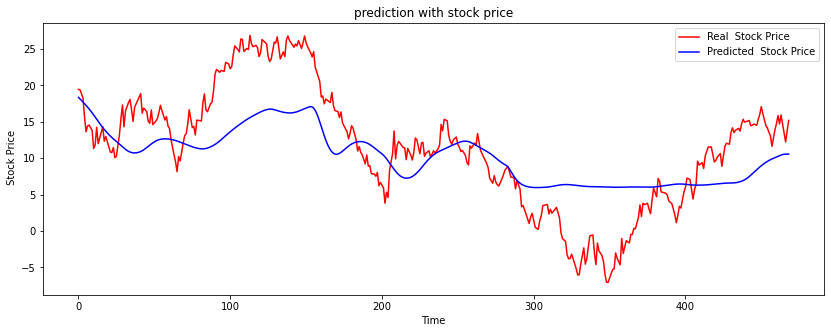

In [37]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real  Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title('prediction with stock price')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [43]:
k = mae(y_pred, y_test)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 4.759825461569305


In [44]:
sklearn.metrics.r2_score(y_test, y_pred)

0.4969054182477868

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

33.05610820296835

In [46]:
mse=mean_squared_error(y_test,y_pred)

In [47]:
mse

33.05610820296835

In [48]:
#RMSE
np.sqrt(mse)

5.749444164696997

In [49]:
# adjusted r2
var_test = y_test.var()
var_test
Adj_rsquare = 1-(mse/var_test)
Adj_rsquare

0.4969054182477869